Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All).

Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE", as well as your name and collaborators below:

In [74]:
Name:""
ID:""

---

# AT82.03 Machine Learning Aug 2021: Final Examination

Happy Wednesday! This is the midterm for Machine Learning in the August 2021 semester.

This exam is 2.5 hours long. Once the exam starts, you will have exactly 2.5 hours to finish your work
and upload your notebook to Google Classroom.

Please fill in this notebook with your code and short answers. Be sure to put all of your code
in the cells marked with

    # YOUR CODE GOES HERE
    
and please put your answers to the short answer questions exactly where you see the remark

*You answer goes here.*

Be complete and precise in your answers! Be sure to answer the question that's being asked. Don't dump random information in the hope that it'll give you partial credit. I give generous partial credit, but I will deduct points for answers that are not on point.

Also beware that if I discover any cheating, I will give you a 0 for the entire exam, or worse, and you will likely fail the class. Just don't do it!

OK, that's all for the advice. Relax, take a deep breath, and good luck!

In [75]:
# Import libralies
import numpy as np
from numpy import linalg
import cvxopt
import cvxopt.solvers
import pylab as pl


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from torch.autograd import Variable

## Question 1: Data exploration plots (10 points)

Consider the dataset below consisting of two input variables/featues and a single target variable:

In [76]:
data = [[-0.04854449138505812, 0.212806014853555, 1], [0.054809748314162826, 0.13943441492047096, 1], [0.3113230080504647, 0.18595493591760043, 1], [0.19548215573337546, -0.3706883319914649, 1], [0.003146758771761583, 0.457726826145377, 1], [-0.1588879004748391, -0.0019617656386743537, 1], [0.12568335499989805, -0.18846440320259258, 1], [0.2995930953299757, -0.020866400798681656, 1], [0.5317975031281347, 0.3031483105961126, 1], [0.16698867076343726, -0.31167320111292407, 1], [-0.14518802742481962, -0.05765225016403619, 1], [0.2204276473758933, -0.12896248529511137, 1], [-0.29180940215209605, -0.043435384925061465, 1], [0.6242978177626274, 0.6322147374160538, 1], [0.5841590323764689, -0.1433187374069571, 1], [0.3518996602888115, 0.653628889844399, 1], [0.7023311772601182, 0.701951348032853, 1], [0.10023959519673387, 0.020545554536430033, 1], [-0.1466070930471291, 0.6519777459598484, 1], [0.3240813987157458, 0.2812227576001451, 1], [0.08172989654412655, 0.6459671096841351, 1], [0.14262633859556778, 0.5820288924039037, 1], [-0.09640220839719371, 0.07937551961917727, 1], [0.45963388698061697, 0.11654844730598748, 1], [0.13422545178226925, 0.19321787705321594, 1], [0.28600049576273945, 0.019866955848141382, 1], [0.385189677974945, 0.5665468607391746, 1], [0.4484821443117948, 0.5639294458608342, 1], [0.7080619540652971, 0.22355978784609198, 1], [0.9324960453123121, 0.10196575734899316, 1], [0.5170348825671245, -0.11402691006672241, 1], [1.0808983993342371, 0.1975498993275028, 1], [0.3512562724315368, 0.03902987711017607, 1], [1.101698581600583, -0.0457012678776063, 1], [0.5241251988958415, -0.39963760269584386, 1], [1.0062480821068476, 0.0017590297198141064, 1], [0.4479997589849948, -0.10294765002924447, 1], [0.5032456111250977, -0.20522547186556622, 1], [0.6549915688729216, -0.5548846958578849, 1], [0.7093169569356323, -0.3913715258297579, 1], [1.1168078326059807, -0.4457866793973105, 1], [0.5672000629320887, 0.18830251522967073, 1], [1.1293915926285787, 0.05959302157431359, 1], [1.0024354664683157, -0.2239965848438501, 1], [1.2992733940088304, -0.0021610592668417916, 1], [0.5757973316593262, 0.03862231186877796, 1], [0.6540063625623846, -0.5710810461239433, 1], [0.5689580849410046, -0.6604982572219629, 1], [1.1130431509908254, -0.4264874292354273, 1], [1.045710792772224, -0.7903125983998085, 1], [0.4073714355704383, -0.17078131321763101, 1], [0.6907032365653683, -0.760749032235156, 1], [0.2914786222774256, -0.27017812637241745, 1], [0.8209564960130302, -1.0498704094263234, 1], [0.8957810535597682, -1.2600708372097182, 1], [0.7427246730264961, -0.8126911830441584, 1], [0.28245134672740513, -1.1999799311810775, 1], [0.7024573311531124, -1.1469288099082318, 1], [0.41329949654870757, -1.037489066448149, 1], [0.21680783113575963, -0.7937181572120973, 1], [0.10852679014212652, -0.7777229503861859, 1], [0.9952021334138138, -1.1580910803167916, 1], [0.377782549086358, -0.9847120752146109, 1], [0.7617352420240004, -1.6214364503356984, 1], [0.43008359739023666, -0.9798059317773921, 1], [0.24026860455231563, -1.712037432742714, 1], [0.5249875225162863, -1.4757015652424796, 1], [0.556884202771597, -1.1693213395820052, 1], [0.5103580302848155, -1.8249407016831127, 1], [0.09903698852450282, -1.8112597451578176, 1], [-0.2841869295021985, -1.8069299599858382, 1], [-0.2167539029095992, -1.2594831416087642, 1], [0.2532289528673598, -1.7050700611196925, 1], [0.034534783316461426, -1.4823465945435856, 1], [-0.46437234583985276, -1.260897170097512, 1], [0.04028289466146917, -1.5909149772636364, 1], [0.16177220776417628, -1.3292160731470528, 1], [-0.5474062183556236, -1.728473555963447, 1], [-0.902056928960828, -1.8835034796442418, 1], [-0.6273517568274376, -1.3210203357153336, 1], [-0.1901290242610545, -1.303653660220138, 1], [-0.7437888635834716, -1.5279769788281725, 1], [-0.6578650330312664, -1.9360929690717534, 1], [-0.36399049120388205, -0.9503996549951409, 1], [-1.018261662123738, -1.1444799358496915, 1], [-0.8751532174824501, -1.354856792996966, 1], [-1.1063368570021135, -1.0269171603328708, 1], [-1.1487743291544315, -1.7987599523941251, 1], [-1.4007783092221298, -1.2240902429230553, 1], [-1.278798172813186, -0.8303964049186163, 1], [-1.1836032786537345, -1.7166552990470993, 1], [-0.9580674479870742, -1.4620807348475071, 1], [-1.209749993660423, -0.9614834770361054, 1], [-1.6811580109939488, -1.4799381440565882, 1], [-1.761078142918985, -1.1111000095879253, 1], [-1.2637056711008117, -1.0244880317798035, 1], [-1.8082187694601508, -0.6617813848118432, 1], [-1.6156173575737904, -0.7165341972972934, 1], [-1.6238175873628862, -0.37871543873491664, 1], [-1.906523759254078, -0.2270092661728963, 1], [-1.4679652641977698, -0.12140533346036542, 1], [-2.377200698769925, -0.9671994436378362, 1], [-2.056700298474672, -0.5928786641729112, 1], [-2.0672835214928744, -0.4316715559929791, 1], [-2.332452139271653, -0.3888062980751451, 1], [-2.554499130282383, -0.25844194608439236, 1], [-2.5713127225384467, -0.4183220611586249, 1], [-1.7738769042157503, -0.4080493857998166, 1], [-1.8909477185473484, 0.5093100687003292, 1], [-1.9173397199947415, 0.6490513179521942, 1], [-2.32968771157802, -0.08907441241565356, 1], [-2.6697565863558563, 0.22406799478023026, 1], [-2.5793751732314076, 0.4973070045298419, 1], [-2.0682118911985015, 0.39883420054173735, 1], [-2.6242309382807267, 0.4795988683375011, 1], [-2.1907763269730043, 0.5049225804509627, 1], [-2.0402437598753047, 1.14324091976213, 1], [-2.281996584510955, 0.7644166660045196, 1], [-1.988485950024689, 1.1316893442570355, 1], [-2.2229402250379815, 1.2818677295433654, 1], [-1.7162936343120392, 1.7163294219604652, 1], [-2.4670065136262735, 1.052431858175023, 1], [-1.598415694288108, 1.2520464515847898, 1], [-1.519258019436009, 1.1296099784421707, 1], [-1.4946384619289321, 1.5237994523077707, 1], [-1.7144710520836122, 1.8965165679549507, 1], [-1.7886903552062328, 2.237736261452438, 1], [-1.5131885886418575, 2.255607595332327, 1], [-1.5643470545372056, 1.8183057964893217, 1], [-1.7022821620228945, 1.6888682465457532, 1], [-0.9798335346208549, 2.04497082347537, 1], [-1.6097668911689682, 2.1219755437933028, 1], [-1.049317633237722, 2.0721963288893215, 1], [-1.0811407438084841, 2.16431548098127, 1], [-1.2834022373739589, 2.2085256686216534, 1], [-0.80893720755137, 2.127717794992943, 1], [-1.152999944189252, 2.3457378150074493, 1], [-1.1529844394366604, 2.7539718644124, 1], [-0.2906874433117317, 2.5958827231948334, 1], [-0.48894274831198753, 3.105139397508821, 1], [-0.2467507286470536, 2.6665819324859332, 1], [-0.0677096512507751, 2.9332455843784535, 1], [0.2523124903036492, 2.7426125048799634, 1], [0.5109296146634743, 2.442296497360008, 1], [-0.2270647955821498, 3.1359286288572674, 1], [0.37872040734606105, 3.2100583530866773, 1], [0.06753832820949662, 3.089732882296194, 1], [0.9436036668895932, 2.5689132135802524, 1], [0.20380550174844025, 3.048417683387475, 1], [0.5741670267118156, 2.8639141194382214, 1], [1.0266493394183343, 2.59596744815397, 1], [1.4872692468258863, 2.5297574195158594, 1], [1.6540045102029253, 2.3070323869863514, 1], [1.6394876189843375, 3.0760843911160745, 1], [1.5785474634279038, 2.390487335601192, 1], [1.6711732490175892, 2.9528031718568037, 1], [2.072559931779275, 2.6649047738062, 1], [1.8261739514435766, 2.7807614087990884, 1], [2.073782900172696, 2.6807361934540053, 1], [1.7834885084587495, 2.553262152433005, 1], [1.9680586199543013, 2.0063870244803077, 1], [2.3965105121146335, 2.4865983201567188, 1], [2.9068839470340953, 2.0092897662711584, 1], [2.7751439072322515, 1.5839999511084613, 1], [2.2708024575234234, 2.461090833107279, 1], [2.431787424526272, 2.233521685471153, 1], [2.925875174428936, 1.4594798657901826, 1], [2.884039700412449, 1.1588960481034842, 1], [3.18296588440203, 1.0736162489609098, 1], [3.5357970636862968, 1.5450302882011027, 1], [3.1427550161745037, 1.0171569053545575, 1], [3.4436139123452363, 1.6026542398067427, 1], [3.4106612722986203, 0.8927450217531678, 1], [3.10746230667866, 1.026087986977195, 1], [3.639616730592049, 0.5001329836131285, 1], [3.2211214772058883, 0.8750075181687683, 1], [3.359170378174272, 0.45645885019151744, 1], [3.9598087793975347, -0.09327623182399244, 1], [3.5902846703540776, 0.2953375170379011, 1], [3.892594245536312, -0.14232801598898626, 1], [3.208834433177035, -0.3497470057603367, 1], [3.673542254383017, -0.11276754968464653, 1], [3.9249950104052376, -0.9781094956678634, 1], [3.110069076227019, -0.7873473467611611, 1], [3.788196275335668, -0.3940829661810197, 1], [3.9987197157342345, -1.3741617436490816, 1], [3.761168156076863, -1.1243932481848251, 1], [3.6778304452033534, -1.7749027523608762, 1], [3.940728364804303, -1.9687720192340223, 1], [2.9678152157229585, -1.7289706634905004, 1], [3.716193657732594, -2.198064633461005, 1], [3.0401170409679907, -2.347079108179521, 1], [3.641145035569216, -2.5830640278279446, 1], [3.319933059962808, -2.689987128556017, 1], [3.4485892413317107, -2.2453092772262595, 1], [2.657279553694127, -2.836938047740822, 1], [2.3238680895789656, -2.3731159819079135, 1], [3.07768179447891, -2.5251551930822416, 1], [2.634671590227112, -2.7857914816335154, 1], [2.480108789569392, -2.7601428911328445, 1], [2.1061983227761516, -3.6305233487556188, 1], [1.9646893348992434, -3.179352057291612, 1], [1.8786352795320906, -3.4931074551678503, 1], [1.5696721981568595, -3.9527009730553595, 1], [1.9195588675651845, -3.7983677932260593, 1], [1.2847916456631592, -4.148158388916798, 1], [1.7331229219957298, -3.983035497479716, 1], [1.519061549595336, -4.165536079965024, 1], [0.7591311084566216, -4.14333123690724, 1], [0.5509508681034843, -4.4269902519832875, 1], [0.9334671004269236, -4.206706330893442, 1], [1.0379290530559595, -4.194004432642196, 1], [-0.06101303200457053, -4.131543002582964, 1], [0.09593241867634186, -3.8864160415761098, 1], [-0.2682070767917146, -4.171811178938285, 1], [-0.18794388577065343, -3.851511693203721, 1], [-0.048583015075304326, -4.645671498001556, 1], [-0.3663625137113926, -4.44746126750064, 1], [-1.1831150689916448, -4.1592262723700895, 1], [-0.9826236940806039, -4.675204965272711, 1], [-0.9266987832835505, -4.618252285934106, 1], [-1.6615404168943015, -4.198613371489077, 1], [-1.3087482313231604, -3.9461447004549672, 1], [-1.6518824305609532, -3.9353959232980653, 1], [-2.1453809833275477, -4.383074121550716, 1], [-2.2441214008637846, -3.6014357813299993, 1], [-2.696427604401087, -3.9230531092417897, 1], [-2.5371630234378917, -3.5702743655899685, 1], [-2.6881414631311324, -3.833596460690706, 1], [-3.1849507695551624, -3.528542761638488, 1], [-3.2192242489214293, -3.1663049444413667, 1], [-2.886020127302828, -3.7089270645596093, 1], [-2.786615517935979, -3.5119051423720915, 1], [-3.8983724732925094, -3.2200757551218318, 1], [-3.6747623899475164, -3.4720663409480395, 1], [-3.4496579754592585, -3.1598940383600707, 1], [-3.5536738118611146, -2.3477889904599767, 1], [-4.395806248826131, -2.6819304149398633, 1], [-4.207608957210868, -1.9909983776124123, 1], [-4.43807579851613, -2.431523655603529, 1], [-4.1133879124436605, -2.084385362270522, 1], [-4.562035966501292, -1.8288064123745102, 1], [-4.921906857645215, -1.3883048969397844, 1], [-4.397760456683037, -1.7465858779040744, 1], [-4.846628592423755, -1.368564931008358, 1], [-4.331745126947112, -0.5862549792154853, 1], [-4.7804302681515, -0.8467126072024186, 1], [-5.331685770354516, -0.35248660652016517, 1], [-5.373261024242352, -0.6129223130927685, 1], [-5.390137591758545, -0.3590880357264702, 1], [-0.45072720274737144, -0.18683918647213404, -1], [-0.1731124596220088, -0.32715858487094507, -1], [0.13520911839323177, -0.3143433279416729, -1], [-0.15785196477134164, 0.13144427959270266, -1], [0.28827165282031636, 0.2666945689915617, -1], [-0.3902004692310689, -0.41086602844887554, -1], [0.39740363624952457, 0.2986138023106988, -1], [0.4423271079773865, 0.14472616398902374, -1], [0.3558712697805026, -0.2566364968425521, -1], [-0.01366415436552551, 0.1703759339689566, -1], [0.28719721323981184, -0.3444889875235967, -1], [-0.24604677046811088, -0.47942629747455057, -1], [-0.09368558027035626, -0.6415252947667587, -1], [0.09225988202088845, 0.28104998428352107, -1], [0.2230422045615788, -0.12018322919488328, -1], [-0.6667436490271101, -0.6789901687970339, -1], [-0.10413006146005466, -0.34007444991071134, -1], [0.06275987160439722, -0.5654378171647947, -1], [-0.28331614744372785, 0.14787488317757297, -1], [-0.6241050293948478, -0.6410374597212978, -1], [-0.47188433875893787, -0.02780131317606399, -1], [-0.3174758678914362, -0.5094745387213293, -1], [-0.17169876363125358, -0.6781217984170257, -1], [-0.04651087331600323, 0.07632227281132434, -1], [-0.6733372654908015, -0.6060815277943465, -1], [-0.8997429697671574, -0.5590835063654781, -1], [-0.8984732738549942, -0.03118236574908481, -1], [-0.5141425631638395, -0.3333584921664894, -1], [-0.804253316681803, -0.4517385898607533, -1], [-0.882225299774345, -0.46196044794950203, -1], [-0.9565905005523521, 0.1714073614615486, -1], [-0.5798558001016785, -0.10908593233736014, -1], [-0.7684900128346266, -0.022403177768926585, -1], [-0.9292552475803763, -0.049553156664719544, -1], [-0.4360926369506809, -0.009427770985300898, -1], [-1.0419591158821968, -0.48854789356139094, -1], [-0.5828114444960488, 0.12345345961048221, -1], [-0.3947201430320073, -0.1363565171350201, -1], [-1.159698056934503, 0.15323778655250703, -1], [-0.4885211997898342, 0.20935162402790786, -1], [-1.0614090015496767, -0.2502400059798109, -1], [-0.520686415002199, 0.36337671225202683, -1], [-0.3948661808192736, 0.1955006173568317, -1], [-0.6121211627847283, 0.44078683503521005, -1], [-0.9311140866485782, -0.015060019471747788, -1], [-0.7928820012363162, 0.7751792243967334, -1], [-0.46793262590167695, 0.2952604077206308, -1], [-0.909335878540879, 0.758843577410957, -1], [-0.4107772607300402, 0.5608900704528659, -1], [-0.955729541532242, 0.6778271761156927, -1], [-0.7882815420736754, 0.9022957926160363, -1], [-0.7769737415131249, 0.3426140485557889, -1], [-0.7930303394939421, 0.8562074320761396, -1], [-0.9908441488622264, 0.47748028107702123, -1], [-0.65355493679984, 0.8939121642917591, -1], [-0.2706762404935539, 0.5448961042373598, -1], [-1.136688200534467, 1.2515698034688447, -1], [-0.6945505860222373, 0.5395640802060113, -1], [-1.084498918784487, 0.6288496467974908, -1], [-0.30731819750912415, 1.389623912878362, -1], [-0.34015202995709626, 0.7944767575800974, -1], [-0.0853833950396613, 0.626770671523173, -1], [-0.33715816496411594, 0.7912570830912247, -1], [-0.11544613576695184, 1.6261752367904032, -1], [-0.20118958172803109, 1.407776902522254, -1], [-0.52067131550915, 1.0727152389411727, -1], [-0.5277194189762127, 1.0038137173736588, -1], [-0.2604767500172669, 0.8800843560930247, -1], [0.13185657274617882, 1.6749404535737196, -1], [0.042541069108620766, 1.5722503451553287, -1], [0.19095231289096767, 1.4553416580587721, -1], [0.09506573458149903, 1.7590863902278577, -1], [0.44725937830788015, 1.4194753860725289, -1], [0.3917629978743146, 1.5807776803594176, -1], [0.28618561229589223, 1.3622622944200402, -1], [-0.16780074420316765, 1.9165789120490193, -1], [0.4479108698414298, 1.7037459710665521, -1], [0.7972810719288987, 1.000767008813348, -1], [0.023694446674740466, 1.862514630702814, -1], [0.8819873638027038, 1.6587532429594827, -1], [0.6547197083663066, 1.4646879129997046, -1], [0.22662804010626236, 1.6721066895537628, -1], [0.41119778880686497, 1.4480168283493193, -1], [1.271097709111527, 1.9458596134227357, -1], [1.0325187943553988, 1.349079377383656, -1], [0.9709927800249686, 1.3927372300949132, -1], [0.5639483686694058, 1.7706296162555775, -1], [1.4954507815020082, 0.9619257093413276, -1], [1.1415040506160827, 1.4337684593306146, -1], [0.9331980487590473, 1.4514024315708953, -1], [1.7519630199319314, 0.8814649470590574, -1], [1.7447460527800047, 1.0414647967535484, -1], [0.947702338926221, 1.1507017786087284, -1], [1.0881663558668049, 1.0741767791447727, -1], [1.2130783485019827, 0.7562530589964923, -1], [1.354173822806346, 1.0210623486599375, -1], [2.085042923180554, 0.7817366595483161, -1], [1.756987075401038, 0.4998932271249691, -1], [1.853727772685419, 1.053747978787166, -1], [1.6046282226316695, 0.22704546328930908, -1], [1.8368706338764103, 0.4177505209579856, -1], [2.1914007268439515, 0.8138030043778332, -1], [2.163316692411847, 0.345229853111199, -1], [1.8370144286415848, 0.06011862084295427, -1], [2.1788858632980532, 0.4741692870792124, -1], [1.7572002702091043, -0.23257351699729814, -1], [2.040389975018595, 0.330288880089485, -1], [2.36503535115274, -0.24999548091580248, -1], [2.0074012339251994, 0.1162822666966386, -1], [2.3752474194196793, 0.008485996379756278, -1], [2.1092490690384653, -0.3643120283662768, -1], [1.916258428589396, 0.0007730909481128978, -1], [1.9654001635087128, -0.7669263931863763, -1], [2.343629076387024, -0.5412190997235778, -1], [2.1456805420794893, -0.8377207318454514, -1], [1.7490603772898685, -0.5838931882512385, -1], [2.450191502512148, -0.40709999770682104, -1], [1.987623774355034, -1.38776545908194, -1], [2.1435796305988024, -1.5439710886157005, -1], [2.0132437523472206, -0.8637869670677498, -1], [1.5773207631531792, -1.6234338667887127, -1], [1.9563691546071422, -1.0711168996305593, -1], [1.92315888616936, -1.6870292827666795, -1], [2.2107619989079392, -1.9606184417201429, -1], [2.2757653913437275, -1.3716996077600243, -1], [1.5225347245211074, -2.091320028420009, -1], [2.067939611452262, -1.936180300680675, -1], [1.8255075244199155, -1.5280999870186645, -1], [1.5904350587262983, -1.5662517170780794, -1], [0.9864421211743212, -1.9984574980467336, -1], [1.8389698420533152, -2.5399831653705705, -1], [1.7019289978466108, -2.494307505918421, -1], [0.8543633267488722, -2.8198897031688794, -1], [1.0361913948059973, -2.2178288410519476, -1], [0.8620413778659142, -2.2181707652069105, -1], [0.5533409035352707, -2.378169128046137, -1], [1.0250311934586485, -2.7133919329163083, -1], [0.42659846806984136, -3.124029728134202, -1], [0.20786904226636171, -3.195236520677778, -1], [0.9008825848262715, -2.2435664144493024, -1], [0.5111059348447292, -2.9057292094127036, -1], [0.41951784018277394, -3.023510852094522, -1], [-0.04800374623573611, -2.519346153089457, -1], [-0.24153769269928754, -2.638702482130912, -1], [-0.48952537598089335, -2.6195712186213074, -1], [-0.03134911220151282, -3.3202830034632167, -1], [-0.2795365553526601, -2.4172771034219274, -1], [-0.40413393112838947, -2.894675111147258, -1], [-0.3346711436059986, -3.0178642039456007, -1], [-0.3211257261977103, -2.6200427408516145, -1], [-1.2910373374473176, -2.498146301371675, -1], [-1.4034648088728328, -2.8719577678697945, -1], [-1.347649220400215, -3.2429207620571328, -1], [-0.8884981727813352, -2.695640844022006, -1], [-1.6324502801566108, -2.602664395630711, -1], [-1.273607911898297, -2.5567314144061504, -1], [-1.7137546634337384, -2.1704577300464307, -1], [-1.6616188550633875, -2.983470558596232, -1], [-2.342023501498593, -2.8278203360999394, -1], [-1.9954937724001711, -2.850227172800518, -1], [-2.1483817069598365, -2.6721088538150206, -1], [-2.305926445597562, -2.277202410411666, -1], [-2.8679196440549735, -2.22677696094875, -1], [-2.4903296671451187, -2.328692769490338, -1], [-2.702442911102704, -2.3433875367704875, -1], [-2.2609839751644953, -2.1757050954012436, -1], [-3.1243916763506094, -2.079768026410481, -1], [-2.6274079633199694, -1.2700626609856172, -1], [-3.0843529280320183, -1.514500593345662, -1], [-3.3392039896845427, -1.0172685853331225, -1], [-3.172974994606808, -1.6879147603977644, -1], [-2.9701049056169095, -1.2068546539909795, -1], [-3.643516124627196, -1.1664066491579492, -1], [-3.5785837795899114, -0.5817126305740807, -1], [-3.353598202059559, -1.0524045534892101, -1], [-3.927823296553745, -0.44167673556068365, -1], [-3.85554981033294, -0.1743693284757033, -1], [-3.416563962423993, 0.08140059209196648, -1], [-3.289803856615632, 0.38804021903587793, -1], [-3.7472110732396486, -0.3837809068959832, -1], [-3.391383974167457, 0.07358823629918196, -1], [-3.2471001003091136, 0.31067828410717385, -1], [-3.204429136021635, 0.7402078706672363, -1], [-3.8915046775593067, 0.5041957182418226, -1], [-3.4959010936606685, 1.177344980731689, -1], [-3.7319194224439083, 0.9589801874435185, -1], [-3.875155352412479, 1.2356736532403514, -1], [-3.0833912094397466, 1.4220317201190906, -1], [-3.1881074632401996, 1.0379923546889258, -1], [-2.9315681862410155, 1.8685503504891945, -1], [-2.9987819469972643, 1.7400901480615576, -1], [-3.247308994900123, 1.8986138581279164, -1], [-2.967100490434749, 2.463099048930381, -1], [-2.758864055178926, 2.1341250195798054, -1], [-3.4875102763477455, 2.048497570132815, -1], [-3.2993289415749634, 2.6371434946590355, -1], [-3.196010624099029, 2.716202552615759, -1], [-2.372530236441007, 2.669777508624578, -1], [-2.4758769519634947, 3.323584854867165, -1], [-2.3335377139022757, 3.105483290673379, -1], [-2.640448423549005, 3.5977837171524496, -1], [-2.1760065893831713, 3.2577795150862126, -1], [-2.4276759942403494, 3.724116545507358, -1], [-1.4769676200917476, 3.5686066740589553, -1], [-1.298233562028376, 3.5692388624863582, -1], [-1.8922620570269717, 3.9694898959358342, -1], [-1.0756683825241673, 3.9284361058513535, -1], [-1.2511843940250675, 4.054959036600319, -1], [-1.5674073976116025, 3.626527137389355, -1], [-1.3522544182019318, 3.702680869079639, -1], [-0.42204623917079287, 4.444549133629565, -1], [-0.10957628244891282, 4.379342939302853, -1], [-0.4762092592433861, 4.074523750289086, -1], [-0.29209116775825883, 4.16469686998676, -1], [0.016213306974264964, 4.267538465825043, -1], [0.21149745003043907, 3.920483283054626, -1], [0.29487309733121914, 4.317362398958934, -1], [0.632016977887336, 4.396352449773952, -1], [0.5572166371657196, 3.807871456296029, -1], [0.6367938117727804, 4.338093193189427, -1], [0.7688479068254663, 4.477426976383363, -1], [0.986189646314898, 3.879109483417067, -1], [1.5742910086362936, 4.297835167475141, -1], [2.099090448434631, 3.8466458505130046, -1], [1.845568432842922, 3.876657278001783, -1], [1.9936601136007925, 4.115327464387498, -1], [2.023766108098714, 4.289486090940193, -1], [2.491527532864059, 4.049611747219568, -1], [2.1006922788744404, 3.6985495620121185, -1], [3.149073900162519, 4.033775468854729, -1], [3.0616431034442955, 3.7729701938556106, -1], [3.0000830014240747, 3.6306654933530806, -1], [3.112523391764825, 2.8035696057961355, -1], [3.8602694424139576, 2.930113399149593, -1], [3.0901865368868746, 2.6305480662407854, -1], [4.0693209083460555, 2.67902275289514, -1], [3.7187347115731075, 3.0261662169039365, -1], [3.7268033429421807, 2.381166463874618, -1], [4.253899469440418, 2.3312815275606624, -1], [4.226007844614248, 2.400982075020465, -1], [4.658533621873059, 2.04198471913426, -1], [4.943041058709358, 2.066109412719043, -1], [4.87479831813466, 1.395674476315787, -1], [4.941396323411314, 1.1563338475344882, -1], [4.648230411660068, 0.8404068448780428, -1], [5.228109827178619, 0.6617264038915005, -1], [4.85793112406844, 1.2279447878859733, -1], [4.646888081879075, 1.1416695279907227, -1], [4.5822650840973145, 0.4271863250676769, -1], [4.730008020560678, -0.029977063533882353, -1]]


In the cell below, write code to split the data into training and validation sets in an 80%/20% ratio, then make two scatterplots, each showing the training set or validation set, with the two classes in different colors.

In [77]:
# Convert data from list to array
np_data = np.array(data)

# Split X and y
X = np_data[:, 0:2]
y = np_data[:, -1]

# Split 80 20
import random

def partition(X, y, percent_train=0.8):
    m = y.shape[0]
    idx = np.arange(0,m)
    random.seed(999)
    random.shuffle(idx)
    #percent_train = 0.6
    m_train = int(m * percent_train)
    train_idx = idx[:m_train]
    test_idx = idx[m_train:]
    X_train = X[train_idx]
    y_train = y[train_idx]
    X_test = X[test_idx]
    y_test = y[test_idx]
    return X_train, X_test,y_train, y_test

X_train, X_val, y_train, y_val = partition(X, y, 0.8)

print(X_train.shape, X_val.shape, y_train.shape, y_val.shape)

(400, 2) (100, 2) (400,) (100,)


In [78]:
# Noted check class imbalanced
np.unique(y, return_counts=True)

(array([-1.,  1.]), array([250, 250]))

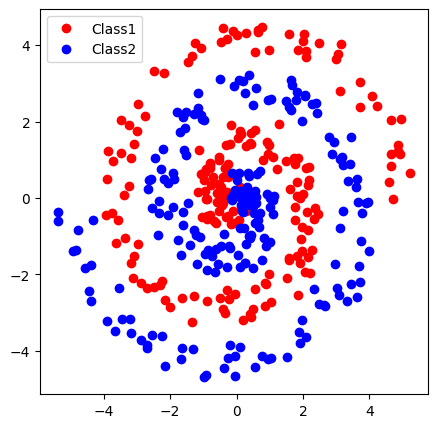

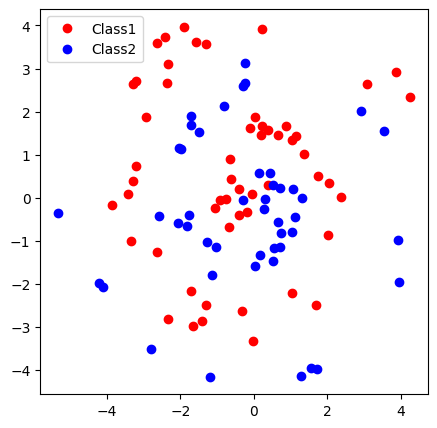

In [79]:
def plot_scatter(X, y, title=''):
    class1_idx = np.where(y == -1)
    class2_idx = np.where(y ==  1)
    plt.title = title
    plt.figure(figsize=(5, 5))
    plt.plot(X[:, 0][class1_idx], X[:, 1][class1_idx], 'ro', label='Class1')
    plt.plot(X[:, 0][class2_idx], X[:, 1][class2_idx], 'bo', label='Class2')
    plt.legend()
    plt.show()

plot_scatter(X_train, y_train, title='Train set')
plot_scatter(X_val, y_val, title='Validation set')

## Question 2: RBF SVM model (30 points)

Use the RBF SVM code (Gaussian kernel) we developed in lab using cvxopt to find a good model that performs well on the validation set. Visualize the result, showing the validation set with the -1/+1 regions of the input space shown in different colors.

You may normalize the data if you find it necessary.


In [80]:
def normalize_data(data):
    
    means = np.mean(data, axis=0) # calculate mean
    stds = np.std(data, axis=0) # calculate std
    data_norm = (data - means) / stds # from formula = (x-mean)/std
    
    return data_norm

# Convert data from list to array
np_data = np.array(data)

# Split X and y
X = np_data[:, 0:2]
y = np_data[:, -1]

X = normalize_data(X)

# Split 80 20
import random

def partition(X, y, percent_train=0.8):
    m = y.shape[0]
    idx = np.arange(0,m)
    random.seed(999)
    random.shuffle(idx)
    #percent_train = 0.6
    m_train = int(m * percent_train)
    train_idx = idx[:m_train]
    test_idx = idx[m_train:]
    X_train = X[train_idx]
    y_train = y[train_idx]
    X_test = X[test_idx]
    y_test = y[test_idx]
    return X_train, X_test,y_train, y_test

X_train, X_val, y_train, y_val = partition(X, y, 0.8)

print(X_train.shape, X_val.shape, y_train.shape, y_val.shape)

(400, 2) (100, 2) (400,) (100,)


KeyboardInterrupt: 

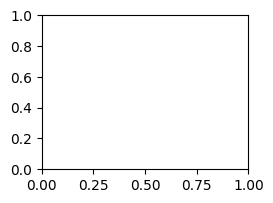

In [81]:
# It is very important to normalize the data in this case, because cvxopt kernel use "euclidean distance". If we do not normalize
# If we do not normalize the data we are unwittingly giving some features more importance than others.

# We do not learn about RBF SVM model yet, so I will use scikit learn in this case.
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.svm import SVC

C = 1.0  # SVM regularization parameter
rbf_svc = svm.SVC(kernel='rbf', gamma=0.7, C=C).fit(X_train, y_train)
h = .02 # Margin maximizer
plt.figure(figsize=(10,10))

# create a mesh to plot in
x_min, x_max = X_val[:, 0].min() - 1, X_val[:, 0].max() + 1
y_min, y_max = X_val[:, 1].min() - 1, X_val[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

plt.subplot(2, 2, 1)
plt.subplots_adjust(wspace=0.4, hspace=0.4)

Z = rbf_svc.predict(np.c_[xx.ravel(), yy.ravel()])
#Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)

# Plot also the training points
plt.scatter(X_val[:, 0], X_val[:, 1], c=y_val, cmap=plt.cm.coolwarm)
plt.xlabel('X')
plt.ylabel('y')
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks(())
plt.yticks(())
plt.suptitle('SVC with RBF kernel')

plt.show()




## Question 3: Neural network model (30 points)

In our deep learning lab, you already found neural networks in the Tensorflow Playground capable of learning this dataset. Using the code developed in lab, find a good multilayer neural network model that performs well on the validation set. Visualize the result, showing the validation set with the -1/+1 regions of the input space shown in different colors.

You may normalize the data if you find it necessary.


In [3]:
# Place code to build, train, and evaluate your PyTorch model here

import torch   #general pytorch
import torch.nn as nn  #neural network module
import torch.nn.functional as F  #useful functions like softmax, or relu

#pip install torchvision; conda install torchvision
from torchvision import datasets, transforms  #transforms for image processing
from torch.utils.data import DataLoader       #dataloader for preparing batch
from torch.utils.data import TensorDataset

import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score
import matplotlib.pyplot as plt
from torch.autograd import Variable


/usr/local/lib/python3.10/dist-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [22]:
data = [[-0.04854449138505812, 0.212806014853555, 1], [0.054809748314162826, 0.13943441492047096, 1], [0.3113230080504647, 0.18595493591760043, 1], [0.19548215573337546, -0.3706883319914649, 1], [0.003146758771761583, 0.457726826145377, 1], [-0.1588879004748391, -0.0019617656386743537, 1], [0.12568335499989805, -0.18846440320259258, 1], [0.2995930953299757, -0.020866400798681656, 1], [0.5317975031281347, 0.3031483105961126, 1], [0.16698867076343726, -0.31167320111292407, 1], [-0.14518802742481962, -0.05765225016403619, 1], [0.2204276473758933, -0.12896248529511137, 1], [-0.29180940215209605, -0.043435384925061465, 1], [0.6242978177626274, 0.6322147374160538, 1], [0.5841590323764689, -0.1433187374069571, 1], [0.3518996602888115, 0.653628889844399, 1], [0.7023311772601182, 0.701951348032853, 1], [0.10023959519673387, 0.020545554536430033, 1], [-0.1466070930471291, 0.6519777459598484, 1], [0.3240813987157458, 0.2812227576001451, 1], [0.08172989654412655, 0.6459671096841351, 1], [0.14262633859556778, 0.5820288924039037, 1], [-0.09640220839719371, 0.07937551961917727, 1], [0.45963388698061697, 0.11654844730598748, 1], [0.13422545178226925, 0.19321787705321594, 1], [0.28600049576273945, 0.019866955848141382, 1], [0.385189677974945, 0.5665468607391746, 1], [0.4484821443117948, 0.5639294458608342, 1], [0.7080619540652971, 0.22355978784609198, 1], [0.9324960453123121, 0.10196575734899316, 1], [0.5170348825671245, -0.11402691006672241, 1], [1.0808983993342371, 0.1975498993275028, 1], [0.3512562724315368, 0.03902987711017607, 1], [1.101698581600583, -0.0457012678776063, 1], [0.5241251988958415, -0.39963760269584386, 1], [1.0062480821068476, 0.0017590297198141064, 1], [0.4479997589849948, -0.10294765002924447, 1], [0.5032456111250977, -0.20522547186556622, 1], [0.6549915688729216, -0.5548846958578849, 1], [0.7093169569356323, -0.3913715258297579, 1], [1.1168078326059807, -0.4457866793973105, 1], [0.5672000629320887, 0.18830251522967073, 1], [1.1293915926285787, 0.05959302157431359, 1], [1.0024354664683157, -0.2239965848438501, 1], [1.2992733940088304, -0.0021610592668417916, 1], [0.5757973316593262, 0.03862231186877796, 1], [0.6540063625623846, -0.5710810461239433, 1], [0.5689580849410046, -0.6604982572219629, 1], [1.1130431509908254, -0.4264874292354273, 1], [1.045710792772224, -0.7903125983998085, 1], [0.4073714355704383, -0.17078131321763101, 1], [0.6907032365653683, -0.760749032235156, 1], [0.2914786222774256, -0.27017812637241745, 1], [0.8209564960130302, -1.0498704094263234, 1], [0.8957810535597682, -1.2600708372097182, 1], [0.7427246730264961, -0.8126911830441584, 1], [0.28245134672740513, -1.1999799311810775, 1], [0.7024573311531124, -1.1469288099082318, 1], [0.41329949654870757, -1.037489066448149, 1], [0.21680783113575963, -0.7937181572120973, 1], [0.10852679014212652, -0.7777229503861859, 1], [0.9952021334138138, -1.1580910803167916, 1], [0.377782549086358, -0.9847120752146109, 1], [0.7617352420240004, -1.6214364503356984, 1], [0.43008359739023666, -0.9798059317773921, 1], [0.24026860455231563, -1.712037432742714, 1], [0.5249875225162863, -1.4757015652424796, 1], [0.556884202771597, -1.1693213395820052, 1], [0.5103580302848155, -1.8249407016831127, 1], [0.09903698852450282, -1.8112597451578176, 1], [-0.2841869295021985, -1.8069299599858382, 1], [-0.2167539029095992, -1.2594831416087642, 1], [0.2532289528673598, -1.7050700611196925, 1], [0.034534783316461426, -1.4823465945435856, 1], [-0.46437234583985276, -1.260897170097512, 1], [0.04028289466146917, -1.5909149772636364, 1], [0.16177220776417628, -1.3292160731470528, 1], [-0.5474062183556236, -1.728473555963447, 1], [-0.902056928960828, -1.8835034796442418, 1], [-0.6273517568274376, -1.3210203357153336, 1], [-0.1901290242610545, -1.303653660220138, 1], [-0.7437888635834716, -1.5279769788281725, 1], [-0.6578650330312664, -1.9360929690717534, 1], [-0.36399049120388205, -0.9503996549951409, 1], [-1.018261662123738, -1.1444799358496915, 1], [-0.8751532174824501, -1.354856792996966, 1], [-1.1063368570021135, -1.0269171603328708, 1], [-1.1487743291544315, -1.7987599523941251, 1], [-1.4007783092221298, -1.2240902429230553, 1], [-1.278798172813186, -0.8303964049186163, 1], [-1.1836032786537345, -1.7166552990470993, 1], [-0.9580674479870742, -1.4620807348475071, 1], [-1.209749993660423, -0.9614834770361054, 1], [-1.6811580109939488, -1.4799381440565882, 1], [-1.761078142918985, -1.1111000095879253, 1], [-1.2637056711008117, -1.0244880317798035, 1], [-1.8082187694601508, -0.6617813848118432, 1], [-1.6156173575737904, -0.7165341972972934, 1], [-1.6238175873628862, -0.37871543873491664, 1], [-1.906523759254078, -0.2270092661728963, 1], [-1.4679652641977698, -0.12140533346036542, 1], [-2.377200698769925, -0.9671994436378362, 1], [-2.056700298474672, -0.5928786641729112, 1], [-2.0672835214928744, -0.4316715559929791, 1], [-2.332452139271653, -0.3888062980751451, 1], [-2.554499130282383, -0.25844194608439236, 1], [-2.5713127225384467, -0.4183220611586249, 1], [-1.7738769042157503, -0.4080493857998166, 1], [-1.8909477185473484, 0.5093100687003292, 1], [-1.9173397199947415, 0.6490513179521942, 1], [-2.32968771157802, -0.08907441241565356, 1], [-2.6697565863558563, 0.22406799478023026, 1], [-2.5793751732314076, 0.4973070045298419, 1], [-2.0682118911985015, 0.39883420054173735, 1], [-2.6242309382807267, 0.4795988683375011, 1], [-2.1907763269730043, 0.5049225804509627, 1], [-2.0402437598753047, 1.14324091976213, 1], [-2.281996584510955, 0.7644166660045196, 1], [-1.988485950024689, 1.1316893442570355, 1], [-2.2229402250379815, 1.2818677295433654, 1], [-1.7162936343120392, 1.7163294219604652, 1], [-2.4670065136262735, 1.052431858175023, 1], [-1.598415694288108, 1.2520464515847898, 1], [-1.519258019436009, 1.1296099784421707, 1], [-1.4946384619289321, 1.5237994523077707, 1], [-1.7144710520836122, 1.8965165679549507, 1], [-1.7886903552062328, 2.237736261452438, 1], [-1.5131885886418575, 2.255607595332327, 1], [-1.5643470545372056, 1.8183057964893217, 1], [-1.7022821620228945, 1.6888682465457532, 1], [-0.9798335346208549, 2.04497082347537, 1], [-1.6097668911689682, 2.1219755437933028, 1], [-1.049317633237722, 2.0721963288893215, 1], [-1.0811407438084841, 2.16431548098127, 1], [-1.2834022373739589, 2.2085256686216534, 1], [-0.80893720755137, 2.127717794992943, 1], [-1.152999944189252, 2.3457378150074493, 1], [-1.1529844394366604, 2.7539718644124, 1], [-0.2906874433117317, 2.5958827231948334, 1], [-0.48894274831198753, 3.105139397508821, 1], [-0.2467507286470536, 2.6665819324859332, 1], [-0.0677096512507751, 2.9332455843784535, 1], [0.2523124903036492, 2.7426125048799634, 1], [0.5109296146634743, 2.442296497360008, 1], [-0.2270647955821498, 3.1359286288572674, 1], [0.37872040734606105, 3.2100583530866773, 1], [0.06753832820949662, 3.089732882296194, 1], [0.9436036668895932, 2.5689132135802524, 1], [0.20380550174844025, 3.048417683387475, 1], [0.5741670267118156, 2.8639141194382214, 1], [1.0266493394183343, 2.59596744815397, 1], [1.4872692468258863, 2.5297574195158594, 1], [1.6540045102029253, 2.3070323869863514, 1], [1.6394876189843375, 3.0760843911160745, 1], [1.5785474634279038, 2.390487335601192, 1], [1.6711732490175892, 2.9528031718568037, 1], [2.072559931779275, 2.6649047738062, 1], [1.8261739514435766, 2.7807614087990884, 1], [2.073782900172696, 2.6807361934540053, 1], [1.7834885084587495, 2.553262152433005, 1], [1.9680586199543013, 2.0063870244803077, 1], [2.3965105121146335, 2.4865983201567188, 1], [2.9068839470340953, 2.0092897662711584, 1], [2.7751439072322515, 1.5839999511084613, 1], [2.2708024575234234, 2.461090833107279, 1], [2.431787424526272, 2.233521685471153, 1], [2.925875174428936, 1.4594798657901826, 1], [2.884039700412449, 1.1588960481034842, 1], [3.18296588440203, 1.0736162489609098, 1], [3.5357970636862968, 1.5450302882011027, 1], [3.1427550161745037, 1.0171569053545575, 1], [3.4436139123452363, 1.6026542398067427, 1], [3.4106612722986203, 0.8927450217531678, 1], [3.10746230667866, 1.026087986977195, 1], [3.639616730592049, 0.5001329836131285, 1], [3.2211214772058883, 0.8750075181687683, 1], [3.359170378174272, 0.45645885019151744, 1], [3.9598087793975347, -0.09327623182399244, 1], [3.5902846703540776, 0.2953375170379011, 1], [3.892594245536312, -0.14232801598898626, 1], [3.208834433177035, -0.3497470057603367, 1], [3.673542254383017, -0.11276754968464653, 1], [3.9249950104052376, -0.9781094956678634, 1], [3.110069076227019, -0.7873473467611611, 1], [3.788196275335668, -0.3940829661810197, 1], [3.9987197157342345, -1.3741617436490816, 1], [3.761168156076863, -1.1243932481848251, 1], [3.6778304452033534, -1.7749027523608762, 1], [3.940728364804303, -1.9687720192340223, 1], [2.9678152157229585, -1.7289706634905004, 1], [3.716193657732594, -2.198064633461005, 1], [3.0401170409679907, -2.347079108179521, 1], [3.641145035569216, -2.5830640278279446, 1], [3.319933059962808, -2.689987128556017, 1], [3.4485892413317107, -2.2453092772262595, 1], [2.657279553694127, -2.836938047740822, 1], [2.3238680895789656, -2.3731159819079135, 1], [3.07768179447891, -2.5251551930822416, 1], [2.634671590227112, -2.7857914816335154, 1], [2.480108789569392, -2.7601428911328445, 1], [2.1061983227761516, -3.6305233487556188, 1], [1.9646893348992434, -3.179352057291612, 1], [1.8786352795320906, -3.4931074551678503, 1], [1.5696721981568595, -3.9527009730553595, 1], [1.9195588675651845, -3.7983677932260593, 1], [1.2847916456631592, -4.148158388916798, 1], [1.7331229219957298, -3.983035497479716, 1], [1.519061549595336, -4.165536079965024, 1], [0.7591311084566216, -4.14333123690724, 1], [0.5509508681034843, -4.4269902519832875, 1], [0.9334671004269236, -4.206706330893442, 1], [1.0379290530559595, -4.194004432642196, 1], [-0.06101303200457053, -4.131543002582964, 1], [0.09593241867634186, -3.8864160415761098, 1], [-0.2682070767917146, -4.171811178938285, 1], [-0.18794388577065343, -3.851511693203721, 1], [-0.048583015075304326, -4.645671498001556, 1], [-0.3663625137113926, -4.44746126750064, 1], [-1.1831150689916448, -4.1592262723700895, 1], [-0.9826236940806039, -4.675204965272711, 1], [-0.9266987832835505, -4.618252285934106, 1], [-1.6615404168943015, -4.198613371489077, 1], [-1.3087482313231604, -3.9461447004549672, 1], [-1.6518824305609532, -3.9353959232980653, 1], [-2.1453809833275477, -4.383074121550716, 1], [-2.2441214008637846, -3.6014357813299993, 1], [-2.696427604401087, -3.9230531092417897, 1], [-2.5371630234378917, -3.5702743655899685, 1], [-2.6881414631311324, -3.833596460690706, 1], [-3.1849507695551624, -3.528542761638488, 1], [-3.2192242489214293, -3.1663049444413667, 1], [-2.886020127302828, -3.7089270645596093, 1], [-2.786615517935979, -3.5119051423720915, 1], [-3.8983724732925094, -3.2200757551218318, 1], [-3.6747623899475164, -3.4720663409480395, 1], [-3.4496579754592585, -3.1598940383600707, 1], [-3.5536738118611146, -2.3477889904599767, 1], [-4.395806248826131, -2.6819304149398633, 1], [-4.207608957210868, -1.9909983776124123, 1], [-4.43807579851613, -2.431523655603529, 1], [-4.1133879124436605, -2.084385362270522, 1], [-4.562035966501292, -1.8288064123745102, 1], [-4.921906857645215, -1.3883048969397844, 1], [-4.397760456683037, -1.7465858779040744, 1], [-4.846628592423755, -1.368564931008358, 1], [-4.331745126947112, -0.5862549792154853, 1], [-4.7804302681515, -0.8467126072024186, 1], [-5.331685770354516, -0.35248660652016517, 1], [-5.373261024242352, -0.6129223130927685, 1], [-5.390137591758545, -0.3590880357264702, 1], [-0.45072720274737144, -0.18683918647213404, -1], [-0.1731124596220088, -0.32715858487094507, -1], [0.13520911839323177, -0.3143433279416729, -1], [-0.15785196477134164, 0.13144427959270266, -1], [0.28827165282031636, 0.2666945689915617, -1], [-0.3902004692310689, -0.41086602844887554, -1], [0.39740363624952457, 0.2986138023106988, -1], [0.4423271079773865, 0.14472616398902374, -1], [0.3558712697805026, -0.2566364968425521, -1], [-0.01366415436552551, 0.1703759339689566, -1], [0.28719721323981184, -0.3444889875235967, -1], [-0.24604677046811088, -0.47942629747455057, -1], [-0.09368558027035626, -0.6415252947667587, -1], [0.09225988202088845, 0.28104998428352107, -1], [0.2230422045615788, -0.12018322919488328, -1], [-0.6667436490271101, -0.6789901687970339, -1], [-0.10413006146005466, -0.34007444991071134, -1], [0.06275987160439722, -0.5654378171647947, -1], [-0.28331614744372785, 0.14787488317757297, -1], [-0.6241050293948478, -0.6410374597212978, -1], [-0.47188433875893787, -0.02780131317606399, -1], [-0.3174758678914362, -0.5094745387213293, -1], [-0.17169876363125358, -0.6781217984170257, -1], [-0.04651087331600323, 0.07632227281132434, -1], [-0.6733372654908015, -0.6060815277943465, -1], [-0.8997429697671574, -0.5590835063654781, -1], [-0.8984732738549942, -0.03118236574908481, -1], [-0.5141425631638395, -0.3333584921664894, -1], [-0.804253316681803, -0.4517385898607533, -1], [-0.882225299774345, -0.46196044794950203, -1], [-0.9565905005523521, 0.1714073614615486, -1], [-0.5798558001016785, -0.10908593233736014, -1], [-0.7684900128346266, -0.022403177768926585, -1], [-0.9292552475803763, -0.049553156664719544, -1], [-0.4360926369506809, -0.009427770985300898, -1], [-1.0419591158821968, -0.48854789356139094, -1], [-0.5828114444960488, 0.12345345961048221, -1], [-0.3947201430320073, -0.1363565171350201, -1], [-1.159698056934503, 0.15323778655250703, -1], [-0.4885211997898342, 0.20935162402790786, -1], [-1.0614090015496767, -0.2502400059798109, -1], [-0.520686415002199, 0.36337671225202683, -1], [-0.3948661808192736, 0.1955006173568317, -1], [-0.6121211627847283, 0.44078683503521005, -1], [-0.9311140866485782, -0.015060019471747788, -1], [-0.7928820012363162, 0.7751792243967334, -1], [-0.46793262590167695, 0.2952604077206308, -1], [-0.909335878540879, 0.758843577410957, -1], [-0.4107772607300402, 0.5608900704528659, -1], [-0.955729541532242, 0.6778271761156927, -1], [-0.7882815420736754, 0.9022957926160363, -1], [-0.7769737415131249, 0.3426140485557889, -1], [-0.7930303394939421, 0.8562074320761396, -1], [-0.9908441488622264, 0.47748028107702123, -1], [-0.65355493679984, 0.8939121642917591, -1], [-0.2706762404935539, 0.5448961042373598, -1], [-1.136688200534467, 1.2515698034688447, -1], [-0.6945505860222373, 0.5395640802060113, -1], [-1.084498918784487, 0.6288496467974908, -1], [-0.30731819750912415, 1.389623912878362, -1], [-0.34015202995709626, 0.7944767575800974, -1], [-0.0853833950396613, 0.626770671523173, -1], [-0.33715816496411594, 0.7912570830912247, -1], [-0.11544613576695184, 1.6261752367904032, -1], [-0.20118958172803109, 1.407776902522254, -1], [-0.52067131550915, 1.0727152389411727, -1], [-0.5277194189762127, 1.0038137173736588, -1], [-0.2604767500172669, 0.8800843560930247, -1], [0.13185657274617882, 1.6749404535737196, -1], [0.042541069108620766, 1.5722503451553287, -1], [0.19095231289096767, 1.4553416580587721, -1], [0.09506573458149903, 1.7590863902278577, -1], [0.44725937830788015, 1.4194753860725289, -1], [0.3917629978743146, 1.5807776803594176, -1], [0.28618561229589223, 1.3622622944200402, -1], [-0.16780074420316765, 1.9165789120490193, -1], [0.4479108698414298, 1.7037459710665521, -1], [0.7972810719288987, 1.000767008813348, -1], [0.023694446674740466, 1.862514630702814, -1], [0.8819873638027038, 1.6587532429594827, -1], [0.6547197083663066, 1.4646879129997046, -1], [0.22662804010626236, 1.6721066895537628, -1], [0.41119778880686497, 1.4480168283493193, -1], [1.271097709111527, 1.9458596134227357, -1], [1.0325187943553988, 1.349079377383656, -1], [0.9709927800249686, 1.3927372300949132, -1], [0.5639483686694058, 1.7706296162555775, -1], [1.4954507815020082, 0.9619257093413276, -1], [1.1415040506160827, 1.4337684593306146, -1], [0.9331980487590473, 1.4514024315708953, -1], [1.7519630199319314, 0.8814649470590574, -1], [1.7447460527800047, 1.0414647967535484, -1], [0.947702338926221, 1.1507017786087284, -1], [1.0881663558668049, 1.0741767791447727, -1], [1.2130783485019827, 0.7562530589964923, -1], [1.354173822806346, 1.0210623486599375, -1], [2.085042923180554, 0.7817366595483161, -1], [1.756987075401038, 0.4998932271249691, -1], [1.853727772685419, 1.053747978787166, -1], [1.6046282226316695, 0.22704546328930908, -1], [1.8368706338764103, 0.4177505209579856, -1], [2.1914007268439515, 0.8138030043778332, -1], [2.163316692411847, 0.345229853111199, -1], [1.8370144286415848, 0.06011862084295427, -1], [2.1788858632980532, 0.4741692870792124, -1], [1.7572002702091043, -0.23257351699729814, -1], [2.040389975018595, 0.330288880089485, -1], [2.36503535115274, -0.24999548091580248, -1], [2.0074012339251994, 0.1162822666966386, -1], [2.3752474194196793, 0.008485996379756278, -1], [2.1092490690384653, -0.3643120283662768, -1], [1.916258428589396, 0.0007730909481128978, -1], [1.9654001635087128, -0.7669263931863763, -1], [2.343629076387024, -0.5412190997235778, -1], [2.1456805420794893, -0.8377207318454514, -1], [1.7490603772898685, -0.5838931882512385, -1], [2.450191502512148, -0.40709999770682104, -1], [1.987623774355034, -1.38776545908194, -1], [2.1435796305988024, -1.5439710886157005, -1], [2.0132437523472206, -0.8637869670677498, -1], [1.5773207631531792, -1.6234338667887127, -1], [1.9563691546071422, -1.0711168996305593, -1], [1.92315888616936, -1.6870292827666795, -1], [2.2107619989079392, -1.9606184417201429, -1], [2.2757653913437275, -1.3716996077600243, -1], [1.5225347245211074, -2.091320028420009, -1], [2.067939611452262, -1.936180300680675, -1], [1.8255075244199155, -1.5280999870186645, -1], [1.5904350587262983, -1.5662517170780794, -1], [0.9864421211743212, -1.9984574980467336, -1], [1.8389698420533152, -2.5399831653705705, -1], [1.7019289978466108, -2.494307505918421, -1], [0.8543633267488722, -2.8198897031688794, -1], [1.0361913948059973, -2.2178288410519476, -1], [0.8620413778659142, -2.2181707652069105, -1], [0.5533409035352707, -2.378169128046137, -1], [1.0250311934586485, -2.7133919329163083, -1], [0.42659846806984136, -3.124029728134202, -1], [0.20786904226636171, -3.195236520677778, -1], [0.9008825848262715, -2.2435664144493024, -1], [0.5111059348447292, -2.9057292094127036, -1], [0.41951784018277394, -3.023510852094522, -1], [-0.04800374623573611, -2.519346153089457, -1], [-0.24153769269928754, -2.638702482130912, -1], [-0.48952537598089335, -2.6195712186213074, -1], [-0.03134911220151282, -3.3202830034632167, -1], [-0.2795365553526601, -2.4172771034219274, -1], [-0.40413393112838947, -2.894675111147258, -1], [-0.3346711436059986, -3.0178642039456007, -1], [-0.3211257261977103, -2.6200427408516145, -1], [-1.2910373374473176, -2.498146301371675, -1], [-1.4034648088728328, -2.8719577678697945, -1], [-1.347649220400215, -3.2429207620571328, -1], [-0.8884981727813352, -2.695640844022006, -1], [-1.6324502801566108, -2.602664395630711, -1], [-1.273607911898297, -2.5567314144061504, -1], [-1.7137546634337384, -2.1704577300464307, -1], [-1.6616188550633875, -2.983470558596232, -1], [-2.342023501498593, -2.8278203360999394, -1], [-1.9954937724001711, -2.850227172800518, -1], [-2.1483817069598365, -2.6721088538150206, -1], [-2.305926445597562, -2.277202410411666, -1], [-2.8679196440549735, -2.22677696094875, -1], [-2.4903296671451187, -2.328692769490338, -1], [-2.702442911102704, -2.3433875367704875, -1], [-2.2609839751644953, -2.1757050954012436, -1], [-3.1243916763506094, -2.079768026410481, -1], [-2.6274079633199694, -1.2700626609856172, -1], [-3.0843529280320183, -1.514500593345662, -1], [-3.3392039896845427, -1.0172685853331225, -1], [-3.172974994606808, -1.6879147603977644, -1], [-2.9701049056169095, -1.2068546539909795, -1], [-3.643516124627196, -1.1664066491579492, -1], [-3.5785837795899114, -0.5817126305740807, -1], [-3.353598202059559, -1.0524045534892101, -1], [-3.927823296553745, -0.44167673556068365, -1], [-3.85554981033294, -0.1743693284757033, -1], [-3.416563962423993, 0.08140059209196648, -1], [-3.289803856615632, 0.38804021903587793, -1], [-3.7472110732396486, -0.3837809068959832, -1], [-3.391383974167457, 0.07358823629918196, -1], [-3.2471001003091136, 0.31067828410717385, -1], [-3.204429136021635, 0.7402078706672363, -1], [-3.8915046775593067, 0.5041957182418226, -1], [-3.4959010936606685, 1.177344980731689, -1], [-3.7319194224439083, 0.9589801874435185, -1], [-3.875155352412479, 1.2356736532403514, -1], [-3.0833912094397466, 1.4220317201190906, -1], [-3.1881074632401996, 1.0379923546889258, -1], [-2.9315681862410155, 1.8685503504891945, -1], [-2.9987819469972643, 1.7400901480615576, -1], [-3.247308994900123, 1.8986138581279164, -1], [-2.967100490434749, 2.463099048930381, -1], [-2.758864055178926, 2.1341250195798054, -1], [-3.4875102763477455, 2.048497570132815, -1], [-3.2993289415749634, 2.6371434946590355, -1], [-3.196010624099029, 2.716202552615759, -1], [-2.372530236441007, 2.669777508624578, -1], [-2.4758769519634947, 3.323584854867165, -1], [-2.3335377139022757, 3.105483290673379, -1], [-2.640448423549005, 3.5977837171524496, -1], [-2.1760065893831713, 3.2577795150862126, -1], [-2.4276759942403494, 3.724116545507358, -1], [-1.4769676200917476, 3.5686066740589553, -1], [-1.298233562028376, 3.5692388624863582, -1], [-1.8922620570269717, 3.9694898959358342, -1], [-1.0756683825241673, 3.9284361058513535, -1], [-1.2511843940250675, 4.054959036600319, -1], [-1.5674073976116025, 3.626527137389355, -1], [-1.3522544182019318, 3.702680869079639, -1], [-0.42204623917079287, 4.444549133629565, -1], [-0.10957628244891282, 4.379342939302853, -1], [-0.4762092592433861, 4.074523750289086, -1], [-0.29209116775825883, 4.16469686998676, -1], [0.016213306974264964, 4.267538465825043, -1], [0.21149745003043907, 3.920483283054626, -1], [0.29487309733121914, 4.317362398958934, -1], [0.632016977887336, 4.396352449773952, -1], [0.5572166371657196, 3.807871456296029, -1], [0.6367938117727804, 4.338093193189427, -1], [0.7688479068254663, 4.477426976383363, -1], [0.986189646314898, 3.879109483417067, -1], [1.5742910086362936, 4.297835167475141, -1], [2.099090448434631, 3.8466458505130046, -1], [1.845568432842922, 3.876657278001783, -1], [1.9936601136007925, 4.115327464387498, -1], [2.023766108098714, 4.289486090940193, -1], [2.491527532864059, 4.049611747219568, -1], [2.1006922788744404, 3.6985495620121185, -1], [3.149073900162519, 4.033775468854729, -1], [3.0616431034442955, 3.7729701938556106, -1], [3.0000830014240747, 3.6306654933530806, -1], [3.112523391764825, 2.8035696057961355, -1], [3.8602694424139576, 2.930113399149593, -1], [3.0901865368868746, 2.6305480662407854, -1], [4.0693209083460555, 2.67902275289514, -1], [3.7187347115731075, 3.0261662169039365, -1], [3.7268033429421807, 2.381166463874618, -1], [4.253899469440418, 2.3312815275606624, -1], [4.226007844614248, 2.400982075020465, -1], [4.658533621873059, 2.04198471913426, -1], [4.943041058709358, 2.066109412719043, -1], [4.87479831813466, 1.395674476315787, -1], [4.941396323411314, 1.1563338475344882, -1], [4.648230411660068, 0.8404068448780428, -1], [5.228109827178619, 0.6617264038915005, -1], [4.85793112406844, 1.2279447878859733, -1], [4.646888081879075, 1.1416695279907227, -1], [4.5822650840973145, 0.4271863250676769, -1], [4.730008020560678, -0.029977063533882353, -1]]


In [23]:
# I think it's necessary to normalize the data because it can help our model converge faster for a given learning rate

def normalize_data(data):
    
    means = np.mean(data, axis=0) # calculate mean
    stds = np.std(data, axis=0) # calculate std
    data_norm = (data - means) / stds # from formula = (x-mean)/std
    
    return data_norm

# Convert data from list to array
np_data = np.array(data)

# Split X and y
X = np_data[:, 0:2]
y = np_data[:, -1]

X = normalize_data(X)

# Features X1 ^ 2 and X2 ^ 2
X_pow2 = np.power(X, 2)

# Feature X1 @ X2
X1 = X[:, 0]
X2 = X[:, 1]

X1X2 = np.zeros(X1.shape[0])
for i in range(X1.shape[0]):
    X1X2[i] = np.dot(X1[i], X2[i])
X1X2 = X1X2.reshape(-1, 1)

In [24]:
# Change y from -1 to 0

for index, i in enumerate(y):
    if i == -1:
        y[index] = 0
np.unique(y, return_counts=True)

(array([0., 1.]), array([250, 250]))

In [25]:
print(X[0], X_pow2[0], X1X2[0])
print(X.shape, X_pow2.shape, X1X2.shape)

[-0.02652201  0.11738565] [0.00070342 0.01377939] [-0.0031133]
(500, 2) (500, 2) (500, 1)


In [26]:
FE_X = np.concatenate((X, X_pow2), axis=1)
FE_X = np.append(FE_X, X1X2, axis=1)
#FE_X = np.insert(FE_X, -1, X1X2, axis = 1)
FE_X[0]

array([-0.02652201,  0.11738565,  0.00070342,  0.01377939, -0.0031133 ])

In [27]:
# Split 80 20
import random

def partition(X, y, percent_train=0.8):
    m = y.shape[0]
    idx = np.arange(0,m)
    random.seed(999)
    random.shuffle(idx)
    #percent_train = 0.6
    m_train = int(m * percent_train)
    train_idx = idx[:m_train]
    test_idx = idx[m_train:]
    X_train = X[train_idx]
    y_train = y[train_idx]
    X_test = X[test_idx]
    y_test = y[test_idx]
    return X_train, X_test,y_train, y_test

X_train, X_val, y_train, y_val = partition(FE_X, y, 0.9)

print(X_train.shape, X_val.shape, y_train.shape, y_val.shape)

# Add dimension to y
#y_train = y_train.reshape(-1, 1)
#y_val = y_val.reshape(-1, 1)

(450, 5) (50, 5) (450,) (50,)


In [28]:
# Convert data to tensor
X_train_tensor = torch.from_numpy(X_train)
y_train_tensor = torch.from_numpy(y_train)

X_val_tensor = torch.from_numpy(X_val)
y_val_tensor = torch.from_numpy(y_val)

In [29]:
# Cast data to dataloader for more convenience
training_set = TensorDataset(X_train_tensor, y_train_tensor)
validation_set = TensorDataset(X_val_tensor, y_val_tensor)

In [30]:
train_batch_size = 4
val_batch_size = 1

train_dl = DataLoader(training_set, train_batch_size, shuffle=True)
val_dl = DataLoader(validation_set, val_batch_size, shuffle=True)

In [31]:
# Check shape

for data, labels in train_dl:
    print(data.shape)
    print(labels.shape)
    break

torch.Size([4, 5])
torch.Size([4])


In [32]:
class NN(nn.Module):
    
    def __init__(self, input_size, hidden_size, output_size):
        super().__init__()  #inherit everything from nn.Module
        self.layer1 = nn.Linear(input_size, hidden_size) # (5, 6)
        self.layer2 = nn.Linear(hidden_size, 120) #(6, 6)
        self.layer3 = nn.Linear(120, output_size) #(6, 2)
        self.relu   = nn.ReLU()
        
    def forward(self, x):
        #print(x.shape)
        out = self.layer1(x)
        #print(out.shape)
        out = self.relu(out)
        #print(out.shape)

        out = self.layer2(out)
        out = self.relu(out)

        out = self.layer3(out)
        out = self.relu(out)
        #print(out.shape)

        return out

In [33]:
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using {device} device")

Using cuda device


In [34]:
model = NN(5, 6, 2).to(device)
model

NN(
  (layer1): Linear(in_features=5, out_features=6, bias=True)
  (layer2): Linear(in_features=6, out_features=120, bias=True)
  (layer3): Linear(in_features=120, out_features=2, bias=True)
  (relu): ReLU()
)

In [35]:
# Extract data from training dataloader to test

for data, label in train_dl:
    test_input = data
    print(test_input.shape)
    break

torch.Size([4, 5])


In [36]:
test_input = test_input.to(torch.float32)
test_input = test_input.to(device)
model(test_input)

tensor([[0.1392, 0.0000],
        [0.3341, 0.0000],
        [0.2067, 0.0000],
        [0.1110, 0.0000]], device='cuda:0', grad_fn=<ReluBackward0>)

In [37]:
# Set hyper parameters
model = NN(5, 6, 2).to(device)
J_fn      = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr = 0.01)


In [38]:
num_epochs = 501  #it depends....trial and error....
#for num_epochs
for epoch in range(num_epochs):
    total_corr = 0
    val_total_corr = 0
    acc = 0
    val_acc = 0
    #for dataloader
    for batch, (x, y) in enumerate(train_dl):

        x = x.float().to(device) # Convert to float32
        y = y.long().to(device)

        #1. predict (forward pass)
        yhat = model(x) # (4, 2)
        # 1.1 Check accuracy
        predicted = torch.max(yhat, 1)[1]
        
        batch_corr = (predicted == y).sum()
        total_corr += batch_corr

        #2. calculate loss
        loss = J_fn(yhat, y)
        
        
        #3. calculate gradient
        optimizer.zero_grad()
        
        # 3.2 called backward() on loss to retrieve all the gradients (backpropagation/backward pass)
        loss.backward()
        
        # 4. update the parameters using the optim
        optimizer.step()  #optim already has learning rate, it also know all the parameters

    if epoch % 50 == 0:
        acc = (total_corr * 100) / (train_batch_size * (batch + 1))
        print(f"Training -> Epoch: {epoch:1.0f}: Loss: {loss:3.2f}; Acc: {acc:3.2f}")

    
    
    with torch.no_grad():
        for val_batch, (val_x, val_y) in enumerate(val_dl):
            
            val_x = val_x.float().to(device)
            val_y = val_y.long().to(device)

            val_yhat = model(val_x)

            val_predicted = torch.max(val_yhat, 1)[1]
            val_batch_corr = (val_predicted == val_y).sum()
            val_total_corr += val_predicted

    val_loss = J_fn(val_yhat, val_y)
            #print(f'val_loss = {val_loss}')

    if epoch % 50 == 0:
        val_acc = (val_total_corr * 100) / (val_batch_size * (val_batch + 1))
        print(f"Validation -> Epoch: {epoch:1.0f}: Loss: {val_loss.item():3.2f}; Acc: {val_acc.item():3.2f}")





        
    



Training -> Epoch: 0: Loss: 0.69; Acc: 48.23
Validation -> Epoch: 0: Loss: 0.69; Acc: 0.00
Training -> Epoch: 50: Loss: 0.00; Acc: 86.95
Validation -> Epoch: 50: Loss: 0.69; Acc: 32.00
Training -> Epoch: 100: Loss: 0.35; Acc: 86.50
Validation -> Epoch: 100: Loss: 0.00; Acc: 32.00
Training -> Epoch: 150: Loss: 0.02; Acc: 87.61
Validation -> Epoch: 150: Loss: 0.00; Acc: 36.00
Training -> Epoch: 200: Loss: 0.35; Acc: 90.71
Validation -> Epoch: 200: Loss: 0.00; Acc: 36.00
Training -> Epoch: 250: Loss: 0.00; Acc: 90.93
Validation -> Epoch: 250: Loss: 0.01; Acc: 40.00
Training -> Epoch: 300: Loss: 0.00; Acc: 89.60
Validation -> Epoch: 300: Loss: 0.00; Acc: 34.00
Training -> Epoch: 350: Loss: 0.35; Acc: 91.37
Validation -> Epoch: 350: Loss: 0.00; Acc: 36.00
Training -> Epoch: 400: Loss: 0.00; Acc: 90.71
Validation -> Epoch: 400: Loss: 0.00; Acc: 36.00
Training -> Epoch: 450: Loss: 0.69; Acc: 91.15
Validation -> Epoch: 450: Loss: 0.69; Acc: 36.00
Training -> Epoch: 500: Loss: 0.00; Acc: 92.92


## Question 4: Robot maze RL (30 points)

In class, we developed policies using Q learning and SARSA for multiple grid worlds.

Construct a maze in a 10x10 grid with a starting location in the lower left and ending location in the upper right.

Train your Q learning or SARSA agent to find the goal. Show the resulting policy in a grid representation
similar to what we developed in class.
